In [17]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# Import any other packages you may want to use


In [35]:
train_df = pd.read_csv("../Data/train.csv")
test_df = pd.read_csv("../Data/test.csv")

In [36]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [37]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,NaN,NaN,NaN,60.083758,34.285143,1.0,30.0,60.0,90.0,119.0
MonthlyCharges,243787.0,NaN,NaN,NaN,12.490695,4.327615,4.990062,8.738543,12.495555,16.23816,19.989957
TotalCharges,243787.0,NaN,NaN,NaN,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
SubscriptionType,243787,3,Standard,81920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,243787,4,Electronic check,61313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,243787,2,No,121980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContentType,243787,3,Both,81737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiDeviceAccess,243787,2,No,122035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceRegistered,243787,4,Computer,61147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ViewingHoursPerWeek,243787.0,NaN,NaN,NaN,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723


In [38]:
test_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountAge,104480.0,NaN,NaN,NaN,60.064692,34.285025,1.0,30.0,60.0,90.0,119.0
MonthlyCharges,104480.0,NaN,NaN,NaN,12.474347,4.331734,4.990051,8.725621,12.453073,16.214247,19.989797
TotalCharges,104480.0,NaN,NaN,NaN,748.167669,520.782838,5.019144,328.961543,649.385029,1081.266991,2376.235183
SubscriptionType,104480,3,Basic,34956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,104480,4,Mailed check,26166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,104480,2,No,52564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContentType,104480,3,Both,35087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiDeviceAccess,104480,2,Yes,52387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceRegistered,104480,4,Tablet,26337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ViewingHoursPerWeek,104480.0,NaN,NaN,NaN,20.489914,11.243173,1.000528,10.767551,20.472305,30.196107,39.999296


In [39]:
continuous=['AccountAge','MonthlyCharges','TotalCharges','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth',
           'SupportTicketsPerMonth','WatchlistSize']
ordinal=['UserRating']
categorical=['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered',
            'GenrePreference','Gender','ParentalControl','SubtitlesEnabled']
target=['Churn']

In [40]:
bin_edges = [0,30,60,90,120]
bin_names = ['0-30', '30-60', '60-90', '90+']
train_df['AccountAgeBin'] = pd.cut(train_df['AccountAge'], bin_edges, labels=bin_names) 
test_df['AccountAgeBin'] = pd.cut(test_df['AccountAge'], bin_edges, labels=bin_names)

bin_edges = [0,8.75,12.5,16.25,20]
bin_names = ['0-8.75', '8.75-12.5', '12.5-16.25', '16.25+']
train_df['MonthlyChargesBin'] = pd.cut(train_df['MonthlyCharges'], bin_edges, labels=bin_names)
test_df['MonthlyChargesBin'] = pd.cut(test_df['MonthlyCharges'], bin_edges, labels=bin_names)

bin_edges = [0,330,650,1085,2400]
bin_names = ['0-330', '330-650', '650-1085', '1085+']
train_df['TotalChargesBin'] = pd.cut(train_df['TotalCharges'], bin_edges, labels=bin_names)
test_df['TotalChargesBin'] = pd.cut(test_df['TotalCharges'], bin_edges, labels=bin_names)

bin_edges = [0,11,21,31,41]
bin_names = ['0-11', '11-21', '21-31', '31+']
train_df['ViewingHoursPerWeekBin'] = pd.cut(train_df['ViewingHoursPerWeek'], bin_edges, labels=bin_names)
test_df['ViewingHoursPerWeekBin'] = pd.cut(test_df['ViewingHoursPerWeek'], bin_edges, labels=bin_names)

bin_edges = [0,50,95,140,180]
bin_names = ['0-50', '50-95', '95-140', '140+']
train_df['AverageViewingDurationBin'] = pd.cut(train_df['AverageViewingDuration'], bin_edges, labels=bin_names)
test_df['AverageViewingDurationBin'] = pd.cut(test_df['AverageViewingDuration'], bin_edges, labels=bin_names)

bin_edges = [0,12,25,38,50]
bin_names = ['0-12', '12-25', '25-38', '38+']
train_df['ContentDownloadsPerMonthBin'] = pd.cut(train_df['ContentDownloadsPerMonth'], bin_edges, labels=bin_names)
test_df['ContentDownloadsPerMonthBin'] = pd.cut(test_df['ContentDownloadsPerMonth'], bin_edges, labels=bin_names)

bin_edges = [1,2,3,4,5]
bin_names = ['1', '2', '3', '4+']
train_df['UserRatingBin'] = pd.cut(train_df['UserRating'], bin_edges, labels=bin_names)
test_df['UserRatingBin'] = pd.cut(test_df['UserRating'], bin_edges, labels=bin_names)

bin_edges = [0,2,5,7,10]
bin_names = ['0-2', '2-5', '5-7', '7+']
train_df['SupportTicketsPerMonthBin'] = pd.cut(train_df['SupportTicketsPerMonth'], bin_edges, labels=bin_names)
test_df['SupportTicketsPerMonthBin'] = pd.cut(test_df['SupportTicketsPerMonth'], bin_edges, labels=bin_names)

bin_edges = [0,7,13,19,25]
bin_names = ['0-7', '7-13', '13-19', '19+']
train_df['WatchlistSizeBin'] = pd.cut(train_df['WatchlistSize'], bin_edges, labels=bin_names)
test_df['WatchlistSizeBin'] = pd.cut(test_df['WatchlistSize'], bin_edges, labels=bin_names)








In [41]:
#log transform

train_df['AccountAgeLog'] = np.log(train_df['AccountAge'])
test_df['AccountAgeLog'] = np.log(test_df['AccountAge'])

train_df['MonthlyChargesLog'] = np.log(train_df['MonthlyCharges'])
test_df['MonthlyChargesLog'] = np.log(test_df['MonthlyCharges'])

train_df['TotalChargesLog'] = np.log(train_df['TotalCharges'])
test_df['TotalChargesLog'] = np.log(test_df['TotalCharges'])

train_df['ViewingHoursPerWeekLog'] = np.log(train_df['ViewingHoursPerWeek'])
test_df['ViewingHoursPerWeekLog'] = np.log(test_df['ViewingHoursPerWeek'])

train_df['AverageViewingDurationLog'] = np.log(train_df['AverageViewingDuration'])
test_df['AverageViewingDurationLog'] = np.log(test_df['AverageViewingDuration'])

train_df['ContentDownloadsPerMonthLog'] = np.log(train_df['ContentDownloadsPerMonth']+1)
test_df['ContentDownloadsPerMonthLog'] = np.log(test_df['ContentDownloadsPerMonth']+1)

train_df['SupportTicketsPerMonthLog'] = np.log(train_df['SupportTicketsPerMonth']+1)
test_df['SupportTicketsPerMonthLog'] = np.log(test_df['SupportTicketsPerMonth']+1)

train_df['WatchlistSizeLog'] = np.log(train_df['WatchlistSize']+1)
test_df['WatchlistSizeLog'] = np.log(test_df['WatchlistSize']+1)

train_df['UserRatingLog'] = np.log(train_df['UserRating'])
test_df['UserRatingLog'] = np.log(test_df['UserRating'])



In [42]:
categorical=categorical+[x+'Bin' for x in continuous]

In [43]:
continuous=continuous+[x+'Log' for x in continuous]

In [44]:
#one hot encoding

X_one_hot_train = pd.get_dummies(train_df[categorical], drop_first=True)
X_one_hot_test = pd.get_dummies(test_df[categorical], drop_first=True)



In [45]:
X_train_cont=train_df[continuous] # independent variables
X_test_cont=test_df[continuous] # independent variables

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

X_train_cont_scaled=scaling.fit_transform(X_train_cont)
X_test_cont_scaled=scaling.transform(X_test_cont)

X_train_cont_scaled=pd.DataFrame(X_train_cont_scaled,columns=X_train_cont.columns)
X_test_cont_scaled=pd.DataFrame(X_test_cont_scaled,columns=X_test_cont.columns)

X_train=pd.concat([X_train_cont_scaled,X_one_hot_train],axis=1)
X_test=pd.concat([X_test_cont_scaled,X_one_hot_test],axis=1)


In [46]:
#test train split

y=train_df['Churn']
X=X_train

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
model_list=[] # list of models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


model_list.append(('Logistic Regression',LogisticRegression()))
model_list.append(('Decision Tree',DecisionTreeClassifier()))
model_list.append(('Random Forest',RandomForestClassifier()))
model_list.append(('Gradient Boosting',GradientBoostingClassifier()))
model_list.append(('XGBoost',XGBClassifier()))
model_list.append(('LightGBM',LGBMClassifier()))
#model_list.append(('CatBoost',CatBoostClassifier()))
model_list.append(('AdaBoost',AdaBoostClassifier()))
model_list.append(('ExtraTrees',ExtraTreesClassifier()))
model_list.append(('KNN',KNeighborsClassifier()))   
#model_list.append(('SVM',SVC()))
model_list.append(('Naive Bayes',GaussianNB()))
model_list.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))
model_list.append(('Quadratic Discriminant Analysis',QuadraticDiscriminantAnalysis()))
model_list.append(('Neural Network',MLPClassifier()))
model_list.append(('Bagging Classifier',BaggingClassifier()))


In [61]:
col = ['Algorithm', 'Model', 'Accuracy_Train', 'Accuracy_Test', 'Precision_Test', 'True_Positive Rate (Recall)','F1_Score_Test',
       'ROC_AUC_SCORE(Avg)']
model_results = pd.DataFrame(columns=col)



In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
i=0
for model_name,model in model_list:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    y_pred_prob=model.predict_proba(X_val)[:,1]

    print("---------------------------------------------")
    print(model_name)
    print(model)
    print('\n')
    print("---------------------------------------------")

    accuracy_train=round(model.score(X_train,y_train)*100,2) 
    accuracy_test=round(accuracy_score(y_val,y_pred)*100,2)
    precision=round(precision_score(y_val,y_pred)*100,2)   
    recall=round(recall_score(y_val,y_pred)*100,2)
    f1=round(f1_score(y_val,y_pred)*100,2)
    roc_auc=round(roc_auc_score(y_val,y_pred_prob)*100,2)

    print('Accuracy Train:',accuracy_train)
    print('Accuracy Test:',accuracy_test)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F1 Score:',f1)
    print('ROC AUC Score:',roc_auc)

    
    model_results.loc[i] = [model_name, model, accuracy_train, accuracy_test, precision, recall, f1, roc_auc]


    i+=1

    print('\n')

print(model_results)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------------------
Logistic Regression
LogisticRegression()


---------------------------------------------
Accuracy Train: 82.41
Accuracy Test: 82.43
Precision: 56.74
Recall: 11.56
F1 Score: 19.2
ROC AUC Score: 75.08


---------------------------------------------
Decision Tree
DecisionTreeClassifier()


---------------------------------------------
Accuracy Train: 100.0
Accuracy Test: 72.59
Precision: 26.59
Recall: 29.37
F1 Score: 27.91
ROC AUC Score: 55.74


---------------------------------------------
Random Forest
RandomForestClassifier()


---------------------------------------------
Accuracy Train: 100.0
Accuracy Test: 82.18
Precision: 53.72
Recall: 9.95
F1 Score: 16.79
ROC AUC Score: 72.78


---------------------------------------------
Gradient Boosting
GradientBoostingClassifier()


---------------------------------------------
Accuracy Train: 82.46
Accuracy Test: 82.41
Precision: 58.16
Recall: 9.36
F1 Score: 16.13
ROC AUC Score: 74.77


---------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---------------------------------------------
Quadratic Discriminant Analysis
QuadraticDiscriminantAnalysis()


---------------------------------------------
Accuracy Train: 74.72
Accuracy Test: 74.45
Precision: 35.22
Recall: 49.37
F1 Score: 41.11
ROC AUC Score: 72.48


---------------------------------------------
Neural Network
MLPClassifier()


---------------------------------------------
Accuracy Train: 83.3
Accuracy Test: 81.8
Precision: 48.81
Recall: 15.32
F1 Score: 23.32
ROC AUC Score: 72.32


---------------------------------------------
Bagging Classifier
BaggingClassifier()


---------------------------------------------
Accuracy Train: 98.02
Accuracy Test: 81.13
Precision: 42.6
Recall: 12.75
F1 Score: 19.63
ROC AUC Score: 66.95


                          Algorithm  \
0               Logistic Regression   
1                     Decision Tree   
2                     Random Forest   
3                 Gradient Boosting   
4                           XGBoost   
5             

In [63]:
model_results.head(20)

,Algorithm,Model,Accuracy_Train,Accuracy_Test,Precision_Test,True_Positive Rate (Recall),F1_Score_Test,ROC_AUC_SCORE(Avg)
0,Logistic Regression,LogisticRegression(),82.41,82.43,56.74,11.56,19.20,75.08
1,Decision Tree,DecisionTreeClassifier(),100.00,72.59,26.59,29.37,27.91,55.74
2,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",100.00,82.18,53.72,9.95,16.79,72.78
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,82.46,82.41,58.16,9.36,16.13,74.77
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",83.55,82.15,52.52,12.55,20.27,73.88
5,LightGBM,LGBMClassifier(),82.70,82.32,55.45,10.78,18.06,74.71
6,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",82.33,82.39,55.71,12.37,20.25,74.43
7,ExtraTrees,"(ExtraTreeClassifier(random_state=692472049), ...",100.00,82.16,53.82,9.07,15.53,72.62
8,KNN,KNeighborsClassifier(),84.74,79.81,37.31,17.25,23.59,63.98
9,Naive Bayes,GaussianNB(),74.64,74.71,36.03,51.51,42.40,73.35


In [65]:
#grid search on all models

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {
    'Logistic Regression': {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'Decision Tree': {'criterion': ['gini', 'entropy'],
                        'max_depth': [2, 4, 6, 8, 10, 12, 14]},
    'Random Forest': {'n_estimators': [100, 200, 300, 400, 500],
                        'max_depth': [5, 8, 15, 25, 30, None],
                        'min_samples_split': [1, 2, 5, 10, 15, 100],
                        'min_samples_leaf': [1, 2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300, 400, 500],
                            'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                            'max_depth': [1, 2, 3, 4, 5, 6, 7]},
    'XGBoost': {'n_estimators': [100, 200, 300, 400, 500],
                'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                'max_depth': [1, 2, 3, 4, 5, 6, 7]},
    'LightGBM': {'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                    'max_depth': [1, 2, 3, 4, 5, 6, 7]},
    'CatBoost': {'iterations': [100, 200, 300, 400, 500],
                    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
    'AdaBoost': {'n_estimators': [100, 200, 300, 400, 500],
                    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
    'ExtraTrees': {'n_estimators': [100, 200, 300, 400, 500],
                    'max_depth': [5, 8, 15, 25, 30, None],
                    'min_samples_split': [1, 2, 5, 10, 15, 100],
                    'min_samples_leaf': [1, 2, 5, 10]},
    'KNN': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree'],
            'p': [1, 2]},
    'SVM': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'Naive Bayes': {'var_smoothing': [1e-09]},
    'Linear Discriminant Analysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'Quadratic Discriminant Analysis': {'reg_param': [0, 0.5, 1, 2, 3]},
    'Neural Network': {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)]}
}

for model_name, model in model_list:
        print(model_name)
        grid = RandomizedSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1, verbose=1)
        best_model = grid.fit(X_train, y_train)
        print('Best Parameters:', best_model.best_params_)
        print('Best Score:', round(best_model.best_score_ * 100, 2))
        print('\n')

        #accuracy metrics
        y_pred=best_model.predict(X_val)
        y_pred_prob=best_model.predict_proba(X_val)[:,1]

        accuracy_train=round(best_model.score(X_train,y_train)*100,2)
        accuracy_test=round(accuracy_score(y_val,y_pred)*100,2)
        precision=round(precision_score(y_val,y_pred)*100,2)
        recall=round(recall_score(y_val,y_pred)*100,2)
        f1=round(f1_score(y_val,y_pred)*100,2)
        roc_auc=round(roc_auc_score(y_val,y_pred_prob)*100,2)

        print('Accuracy Train:',accuracy_train)
        print('Accuracy Test:',accuracy_test)
        print('Precision:',precision)
        print('Recall:',recall)
        print('F1 Score:',f1)
        print('ROC AUC Score:',roc_auc)

        model_results.loc[i] = [model_name, best_model, accuracy_train, accuracy_test, precision, recall, f1, roc_auc]
        i+=1

        print(model_results.head(20))





Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

Best Parameters: {'penalty': 'l2', 'C': 0.01}
Best Score: 82.41


Accuracy Train: 82.41
Accuracy Test: 82.45
Precision: 57.22
Recall: 11.45
F1 Score: 19.08
ROC AUC Score: 75.09
                          Algorithm  \
0               Logistic Regression   
1                     Decision Tree   
2                     Random Forest   
3                 Gradient Boosting   
4                           XGBoost   
5                          LightGBM   
6                          AdaBoost   
7                        ExtraTrees   
8                               KNN   
9                       Naive Bayes   
10     Linear Discriminant Analysis   
11  Quadratic Discriminant Analysis   
12                   Neural Network   
13               Bagging Classifier   
14              Logistic Regression   
15                    Decision Tree   
16                    Random Forest   
17                Gradient Boosting   
18                          XGBoost   
19                         LightGBM   

   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 400, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_depth': 30}
Best Score: 82.28


Accuracy Train: 83.19
Accuracy Test: 82.33
Precision: 58.85
Recall: 7.3
F1 Score: 12.98
ROC AUC Score: 74.32
                          Algorithm  \
0               Logistic Regression   
1                     Decision Tree   
2                     Random Forest   
3                 Gradient Boosting   
4                           XGBoost   
5                          LightGBM   
6                          AdaBoost   
7                        ExtraTrees   
8                               KNN   
9                       Naive Bayes   
10     Linear Discriminant Analysis   
11  Quadratic Discriminant Analysis   
12                   Neural Network   
13               Bagging Classifier   
14              Logistic Regression   
15                    Decision Tree   
16                    Random Forest   
17                Gradient Boosting   
18                       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_tra

KeyboardInterrupt: 

In [66]:
model_results.head(20)

,Algorithm,Model,Accuracy_Train,Accuracy_Test,Precision_Test,True_Positive Rate (Recall),F1_Score_Test,ROC_AUC_SCORE(Avg)
0,Logistic Regression,LogisticRegression(),82.41,82.43,56.74,11.56,19.20,75.08
1,Decision Tree,DecisionTreeClassifier(),100.00,72.59,26.59,29.37,27.91,55.74
2,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",100.00,82.18,53.72,9.95,16.79,72.78
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,82.46,82.41,58.16,9.36,16.13,74.77
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",83.55,82.15,52.52,12.55,20.27,73.88
5,LightGBM,LGBMClassifier(),82.70,82.32,55.45,10.78,18.06,74.71
6,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",82.33,82.39,55.71,12.37,20.25,74.43
7,ExtraTrees,"(ExtraTreeClassifier(random_state=692472049), ...",100.00,82.16,53.82,9.07,15.53,72.62
8,KNN,KNeighborsClassifier(),84.74,79.81,37.31,17.25,23.59,63.98
9,Naive Bayes,GaussianNB(),74.64,74.71,36.03,51.51,42.40,73.35


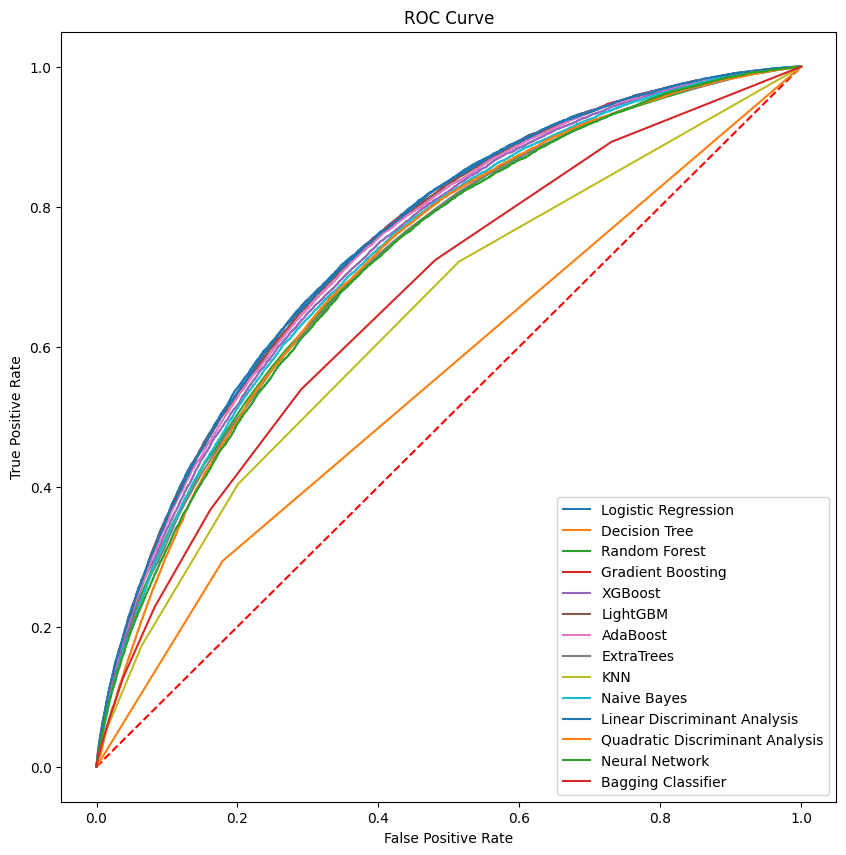

In [67]:
#model evaluation

#plotting roc curve
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--')

for model_name,model in model_list:
    y_pred_prob=model.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds=roc_curve(y_val,y_pred_prob)
    plt.plot(fpr,tpr,label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



Accuracy Train: 82.41
Accuracy Test: 82.45
Precision: 56.99
Recall: 11.59
F1 Score: 19.27
ROC AUC Score: 75.09


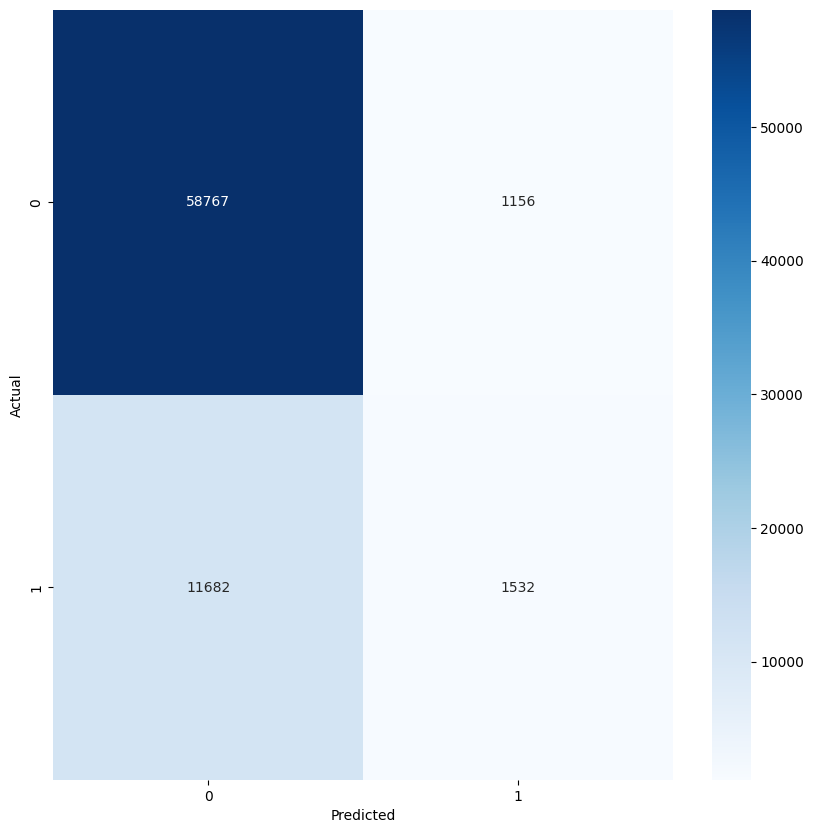

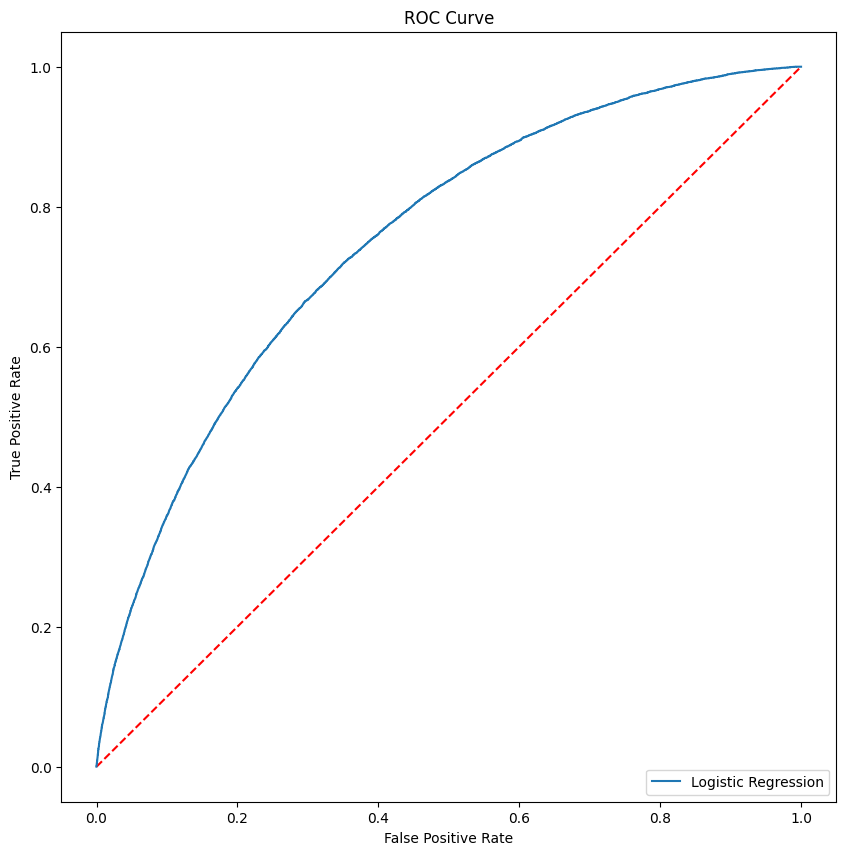

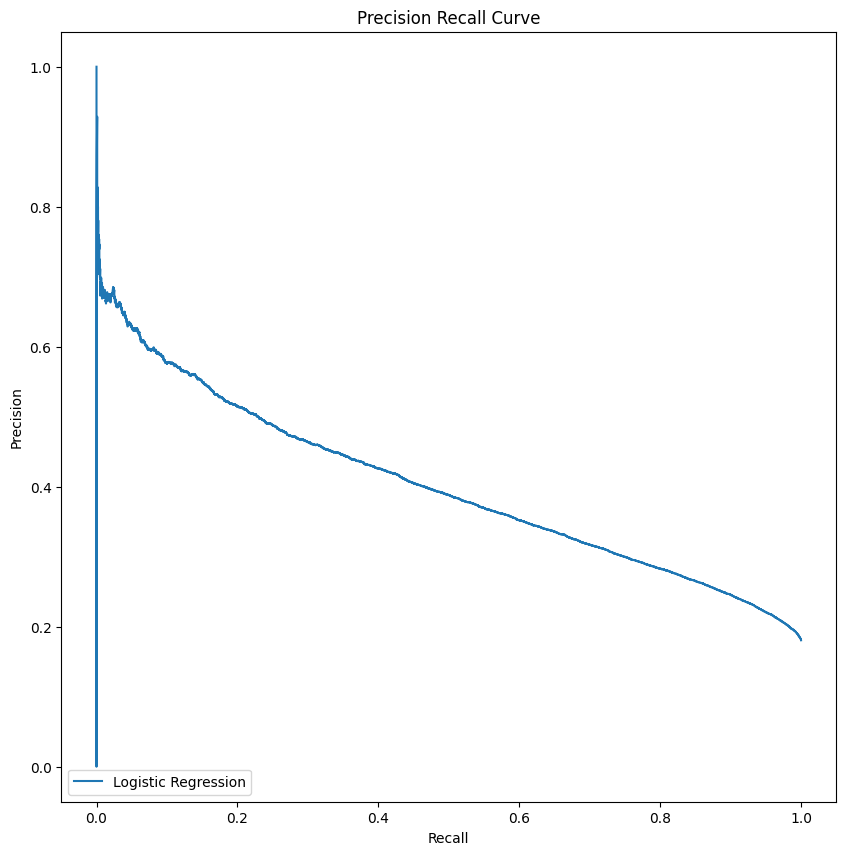

In [68]:
#redoing logistic regression with best parameters

logreg=LogisticRegression(C=0.1,penalty='l2',solver='liblinear')

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_val)

y_pred_prob=logreg.predict_proba(X_val)[:,1]

accuracy_train=round(logreg.score(X_train,y_train)*100,2)
accuracy_test=round(accuracy_score(y_val,y_pred)*100,2)
precision=round(precision_score(y_val,y_pred)*100,2)
recall=round(recall_score(y_val,y_pred)*100,2)
f1=round(f1_score(y_val,y_pred)*100,2)
roc_auc=round(roc_auc_score(y_val,y_pred_prob)*100,2)

print('Accuracy Train:',accuracy_train)
print('Accuracy Test:',accuracy_test)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)
print('ROC AUC Score:',roc_auc)

#plotting confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_val,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#plotting roc curve
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--')

y_pred_prob=logreg.predict_proba(X_val)[:,1]
fpr,tpr,thresholds=roc_curve(y_val,y_pred_prob)
plt.plot(fpr,tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

#plotting precision recall curve

from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10,10))

y_pred_prob=logreg.predict_proba(X_val)[:,1]
precision,recall,thresholds=precision_recall_curve(y_val,y_pred_prob)
plt.plot(recall,precision,label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision Recall Curve')

plt.legend(loc='lower left')

plt.show()



In [69]:
X.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,WatchlistSize,AccountAgeLog,MonthlyChargesLog,...,AverageViewingDurationBin_140+,ContentDownloadsPerMonthBin_12-25,ContentDownloadsPerMonthBin_25-38,ContentDownloadsPerMonthBin_38+,SupportTicketsPerMonthBin_2-5,SupportTicketsPerMonthBin_5-7,SupportTicketsPerMonthBin_7+,WatchlistSizeBin_7-13,WatchlistSizeBin_13-19,WatchlistSizeBin_19+
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.175519,-1.253786,-0.879735,-0.141536,...,0,0,0,0,1,0,0,0,0,0
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,1.216976,1.526687,0.250417,-2.127296,...,0,1,0,0,0,0,1,0,0,1
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,0.520728,-1.531833,0.517393,0.096154,...,0,1,0,0,0,1,0,0,0,0
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,-0.871766,1.665711,-0.372558,-1.240361,...,0,0,1,0,0,0,0,0,0,1
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,-0.175519,-1.670857,0.250417,0.977015,...,0,1,0,0,1,0,0,0,0,0


In [70]:
X.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth',
       'SupportTicketsPerMonth', 'WatchlistSize', 'AccountAgeLog',
       'MonthlyChargesLog', 'TotalChargesLog', 'ViewingHoursPerWeekLog',
       'AverageViewingDurationLog', 'ContentDownloadsPerMonthLog',
       'SupportTicketsPerMonthLog', 'WatchlistSizeLog',
       'SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaperlessBilling_Yes',
       'ContentType_Movies', 'ContentType_TV Shows', 'MultiDeviceAccess_Yes',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Comedy',
       'GenrePreference_Drama', 'GenrePreference_Fantasy',
       'GenrePreference_Sci-Fi', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes', 'AccountAgeBin_30-60', 'AccountAgeBin_60-90',
 

In [71]:
#reload data

df=pd.read_csv('../Data/train.csv')



In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,NaN,NaN,NaN,60.083758,34.285143,1.0,30.0,60.0,90.0,119.0
MonthlyCharges,243787.0,NaN,NaN,NaN,12.490695,4.327615,4.990062,8.738543,12.495555,16.23816,19.989957
TotalCharges,243787.0,NaN,NaN,NaN,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
SubscriptionType,243787,3,Standard,81920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,243787,4,Electronic check,61313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,243787,2,No,121980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContentType,243787,3,Both,81737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiDeviceAccess,243787,2,No,122035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceRegistered,243787,4,Computer,61147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ViewingHoursPerWeek,243787.0,NaN,NaN,NaN,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723


In [77]:
df.SubscriptionType.value_counts()

Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64

In [78]:
df.PaymentMethod.value_counts()

Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64

In [79]:
df.PaperlessBilling.value_counts()

No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64

In [81]:
df.ContentType.value_counts()

Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64

In [82]:
df.MultiDeviceAccess.value_counts()

No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64

In [83]:
df.DeviceRegistered.value_counts()

Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64

In [84]:
df.GenrePreference.value_counts()

Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: GenrePreference, dtype: int64

In [85]:
df.ParentalControl.value_counts()

Yes    122085
No     121702
Name: ParentalControl, dtype: int64

In [86]:
df.SubtitlesEnabled.value_counts()

Yes    122180
No     121607
Name: SubtitlesEnabled, dtype: int64

In [90]:
def cross_tab(df,col1,col2):
    print(f"Cross Tab between {col1} and {col2}")
    ct=pd.crosstab(df[col1],df[col2],normalize='index')*100
    print(ct)
    print('\n')
    print('--------------------------------------------------')
    

cross_tab(df,'SubscriptionType','PaymentMethod')

Cross Tab between SubscriptionType and PaymentMethod
PaymentMethod     Bank transfer  Credit card  Electronic check  Mailed check
SubscriptionType                                                            
Basic                 24.979642    25.045034         25.143738     24.831585
Premium               24.998453    24.965044         25.336254     24.700249
Standard              24.838867    24.962158         24.973145     25.225830


--------------------------------------------------


In [92]:
[cross_tab(df,'Churn',i) for i in categorical]

Cross Tab between Churn and SubscriptionType
SubscriptionType      Basic    Premium   Standard
Churn                                            
0                 32.625435  33.897948  33.476616
1                 36.050880  29.774569  34.174551


--------------------------------------------------
Cross Tab between Churn and PaymentMethod
PaymentMethod  Bank transfer  Credit card  Electronic check  Mailed check
Churn                                                                    
0                  24.998372    25.570001         24.804990     24.626638
1                  24.668417    22.373365         26.709972     26.248246


--------------------------------------------------
Cross Tab between Churn and PaperlessBilling
PaperlessBilling         No        Yes
Churn                                 
0                 50.013777  49.986223
1                 50.133539  49.866461


--------------------------------------------------
Cross Tab between Churn and ContentType
ContentType      

[None, None, None, None, None, None, None, None, None, None]

In [93]:
def cross_tab_3cols(df,col1,col2,col3):
    print(f"Cross Tab between {col1} and {col2} and {col3}")
    ct=pd.crosstab([df[col1],df[col2]],df[col3],normalize='index')*100
    print(ct)
    print('\n')
    print('--------------------------------------------------')

    

In [94]:
for i in categorical:
    for j in categorical:
        if i!=j:
            cross_tab_3cols(df,i,j,'Churn')

Cross Tab between SubscriptionType and PaymentMethod and Churn
Churn                                      0          1
SubscriptionType PaymentMethod                         
Basic            Bank transfer     80.509730  19.490270
                 Credit card       82.624760  17.375240
                 Electronic check  78.993081  21.006919
                 Mailed check      79.260658  20.739342
Premium          Bank transfer     84.314211  15.685789
                 Credit card       85.294409  14.705591
                 Electronic check  82.916585  17.083415
                 Mailed check      82.361487  17.638513
Standard         Bank transfer     81.403578  18.596422
                 Credit card       83.417282  16.582718
                 Electronic check  80.340209  19.659791
                 Mailed check      81.117832  18.882168


--------------------------------------------------
Cross Tab between SubscriptionType and PaperlessBilling and Churn
Churn                             

In [96]:
train_df=pd.read_csv('../Data/train.csv')
test_df=pd.read_csv('../Data/test.csv')

In [97]:
bin_edges = [0,30,60,90,120]
bin_names = ['0-30', '30-60', '60-90', '90+']
train_df['AccountAgeBin'] = pd.cut(train_df['AccountAge'], bin_edges, labels=bin_names) 
test_df['AccountAgeBin'] = pd.cut(test_df['AccountAge'], bin_edges, labels=bin_names)

bin_edges = [0,8.75,12.5,16.25,20]
bin_names = ['0-8.75', '8.75-12.5', '12.5-16.25', '16.25+']
train_df['MonthlyChargesBin'] = pd.cut(train_df['MonthlyCharges'], bin_edges, labels=bin_names)
test_df['MonthlyChargesBin'] = pd.cut(test_df['MonthlyCharges'], bin_edges, labels=bin_names)

bin_edges = [0,330,650,1085,2400]
bin_names = ['0-330', '330-650', '650-1085', '1085+']
train_df['TotalChargesBin'] = pd.cut(train_df['TotalCharges'], bin_edges, labels=bin_names)
test_df['TotalChargesBin'] = pd.cut(test_df['TotalCharges'], bin_edges, labels=bin_names)

bin_edges = [0,11,21,31,41]
bin_names = ['0-11', '11-21', '21-31', '31+']
train_df['ViewingHoursPerWeekBin'] = pd.cut(train_df['ViewingHoursPerWeek'], bin_edges, labels=bin_names)
test_df['ViewingHoursPerWeekBin'] = pd.cut(test_df['ViewingHoursPerWeek'], bin_edges, labels=bin_names)

bin_edges = [0,50,95,140,180]
bin_names = ['0-50', '50-95', '95-140', '140+']
train_df['AverageViewingDurationBin'] = pd.cut(train_df['AverageViewingDuration'], bin_edges, labels=bin_names)
test_df['AverageViewingDurationBin'] = pd.cut(test_df['AverageViewingDuration'], bin_edges, labels=bin_names)

bin_edges = [0,12,25,38,50]
bin_names = ['0-12', '12-25', '25-38', '38+']
train_df['ContentDownloadsPerMonthBin'] = pd.cut(train_df['ContentDownloadsPerMonth'], bin_edges, labels=bin_names)
test_df['ContentDownloadsPerMonthBin'] = pd.cut(test_df['ContentDownloadsPerMonth'], bin_edges, labels=bin_names)

bin_edges = [1,2,3,4,5]
bin_names = ['1', '2', '3', '4+']
train_df['UserRatingBin'] = pd.cut(train_df['UserRating'], bin_edges, labels=bin_names)
test_df['UserRatingBin'] = pd.cut(test_df['UserRating'], bin_edges, labels=bin_names)

bin_edges = [0,2,5,7,10]
bin_names = ['0-2', '2-5', '5-7', '7+']
train_df['SupportTicketsPerMonthBin'] = pd.cut(train_df['SupportTicketsPerMonth'], bin_edges, labels=bin_names)
test_df['SupportTicketsPerMonthBin'] = pd.cut(test_df['SupportTicketsPerMonth'], bin_edges, labels=bin_names)

bin_edges = [0,7,13,19,25]
bin_names = ['0-7', '7-13', '13-19', '19+']
train_df['WatchlistSizeBin'] = pd.cut(train_df['WatchlistSize'], bin_edges, labels=bin_names)
test_df['WatchlistSizeBin'] = pd.cut(test_df['WatchlistSize'], bin_edges, labels=bin_names)




In [98]:
continuous=['AccountAge','MonthlyCharges','TotalCharges','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth',
           'SupportTicketsPerMonth','WatchlistSize','UserRating']

categorical=['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered',
            'GenrePreference','Gender','ParentalControl','SubtitlesEnabled']
target=['Churn']

In [99]:
categorical=categorical+[i+'Bin' for i in continuous]


In [100]:
train_df['AccountAgeLog'] = np.log(train_df['AccountAge'])
test_df['AccountAgeLog'] = np.log(test_df['AccountAge'])

train_df['MonthlyChargesLog'] = np.log(train_df['MonthlyCharges'])
test_df['MonthlyChargesLog'] = np.log(test_df['MonthlyCharges'])

train_df['TotalChargesLog'] = np.log(train_df['TotalCharges'])
test_df['TotalChargesLog'] = np.log(test_df['TotalCharges'])

train_df['ViewingHoursPerWeekLog'] = np.log(train_df['ViewingHoursPerWeek'])
test_df['ViewingHoursPerWeekLog'] = np.log(test_df['ViewingHoursPerWeek'])

train_df['AverageViewingDurationLog'] = np.log(train_df['AverageViewingDuration'])
test_df['AverageViewingDurationLog'] = np.log(test_df['AverageViewingDuration'])

train_df['ContentDownloadsPerMonthLog'] = np.log(train_df['ContentDownloadsPerMonth']+1)
test_df['ContentDownloadsPerMonthLog'] = np.log(test_df['ContentDownloadsPerMonth']+1)

train_df['SupportTicketsPerMonthLog'] = np.log(train_df['SupportTicketsPerMonth']+1)
test_df['SupportTicketsPerMonthLog'] = np.log(test_df['SupportTicketsPerMonth']+1)

train_df['WatchlistSizeLog'] = np.log(train_df['WatchlistSize']+1)
test_df['WatchlistSizeLog'] = np.log(test_df['WatchlistSize']+1)

train_df['UserRatingLog'] = np.log(train_df['UserRating'])
test_df['UserRatingLog'] = np.log(test_df['UserRating'])

In [101]:
continuous=continuous+[i+'Log' for i in continuous]

In [105]:
combined=[]
for i in categorical:
    for j in categorical:
        if i!=j:
            train_df[i+'_'+j]=train_df[i].astype(str)+'_'+train_df[j].astype(str)
            test_df[i+'_'+j]=test_df[i].astype(str)+'_'+test_df[j].astype(str)
            combined=combined+[i+'_'+j]

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_11371/198333510.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[i+'_'+j]=test_df[i].astype(str)+'_'+test_df[j].astype(str)
/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_11371/198333510.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[i+'_'+j]=test_df[i].astype(str)+'_'+test_df[j].astype(str)
/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_11371/198333510.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [106]:
combined

['SubscriptionType_PaymentMethod',
 'SubscriptionType_PaperlessBilling',
 'SubscriptionType_ContentType',
 'SubscriptionType_MultiDeviceAccess',
 'SubscriptionType_DeviceRegistered',
 'SubscriptionType_GenrePreference',
 'SubscriptionType_Gender',
 'SubscriptionType_ParentalControl',
 'SubscriptionType_SubtitlesEnabled',
 'SubscriptionType_AccountAgeBin',
 'SubscriptionType_MonthlyChargesBin',
 'SubscriptionType_TotalChargesBin',
 'SubscriptionType_ViewingHoursPerWeekBin',
 'SubscriptionType_AverageViewingDurationBin',
 'SubscriptionType_ContentDownloadsPerMonthBin',
 'SubscriptionType_SupportTicketsPerMonthBin',
 'SubscriptionType_WatchlistSizeBin',
 'SubscriptionType_UserRatingBin',
 'PaymentMethod_SubscriptionType',
 'PaymentMethod_PaperlessBilling',
 'PaymentMethod_ContentType',
 'PaymentMethod_MultiDeviceAccess',
 'PaymentMethod_DeviceRegistered',
 'PaymentMethod_GenrePreference',
 'PaymentMethod_Gender',
 'PaymentMethod_ParentalControl',
 'PaymentMethod_SubtitlesEnabled',
 'Payme

In [107]:
train_df[combined].head()

,SubscriptionType_PaymentMethod,SubscriptionType_PaperlessBilling,SubscriptionType_ContentType,SubscriptionType_MultiDeviceAccess,SubscriptionType_DeviceRegistered,SubscriptionType_GenrePreference,SubscriptionType_Gender,SubscriptionType_ParentalControl,SubscriptionType_SubtitlesEnabled,SubscriptionType_AccountAgeBin,...,UserRatingBin_ParentalControl,UserRatingBin_SubtitlesEnabled,UserRatingBin_AccountAgeBin,UserRatingBin_MonthlyChargesBin,UserRatingBin_TotalChargesBin,UserRatingBin_ViewingHoursPerWeekBin,UserRatingBin_AverageViewingDurationBin,UserRatingBin_ContentDownloadsPerMonthBin,UserRatingBin_SupportTicketsPerMonthBin,UserRatingBin_WatchlistSizeBin
0,Premium_Mailed check,Premium_No,Premium_Both,Premium_No,Premium_Mobile,Premium_Sci-Fi,Premium_Male,Premium_No,Premium_No,Premium_0-30,...,2_No,2_No,2_0-30,2_8.75-12.5,2_0-330,2_31+,2_50-95,2_0-12,2_2-5,2_0-7
1,Basic_Credit card,Basic_Yes,Basic_Movies,Basic_No,Basic_Tablet,Basic_Action,Basic_Male,Basic_No,Basic_Yes,Basic_30-60,...,3_No,3_Yes,3_30-60,3_0-8.75,3_0-330,3_31+,3_0-50,3_12-25,3_7+,3_19+
2,Basic_Mailed check,Basic_Yes,Basic_Movies,Basic_No,Basic_Computer,Basic_Fantasy,Basic_Male,Basic_Yes,Basic_Yes,Basic_60-90,...,4+_Yes,4+_Yes,4+_60-90,4+_8.75-12.5,4+_650-1085,4+_0-11,4+_50-95,4+_12-25,4+_5-7,4+_0-7
3,Basic_Electronic check,Basic_No,Basic_TV Shows,Basic_No,Basic_Tablet,Basic_Drama,Basic_Male,Basic_Yes,Basic_Yes,Basic_30-60,...,4+_Yes,4+_Yes,4+_30-60,4+_0-8.75,4+_0-330,4+_21-31,4+_95-140,4+_25-38,4+_0-2,4+_19+
4,Premium_Electronic check,Premium_Yes,Premium_TV Shows,Premium_No,Premium_TV,Premium_Comedy,Premium_Female,Premium_No,Premium_No,Premium_30-60,...,3_No,3_No,3_30-60,3_16.25+,3_650-1085,3_11-21,3_0-50,3_12-25,3_2-5,3_nan


In [108]:
train_df_onehot=pd.get_dummies(train_df[combined],drop_first=True)
test_df_onehot=pd.get_dummies(test_df[combined],drop_first=True)

In [109]:
train_df_onehot.shape

(243787, 4008)

In [110]:
test_df_onehot.shape

(104480, 4008)

In [112]:

model=LogisticRegression()
model.fit(train_df_onehot,train_df[target])
y_pred=model.predict(train_df_onehot)
y_pred_prob=model.predict_proba(train_df_onehot)[:,1]
print(model_name)
accuracy_train=round(model.score(train_df_onehot,train_df[target])*100,2) 
accuracy_test=round(accuracy_score(train_df[target],y_pred)*100,2)
precision=round(precision_score(train_df[target],y_pred)*100,2)   
recall=round(recall_score(train_df[target],y_pred)*100,2)
f1=round(f1_score(train_df[target],y_pred)*100,2)
roc_auc=round(roc_auc_score(train_df[target],y_pred)*100,2)
print('Accuracy Train:',accuracy_train)
print('Accuracy Test:',accuracy_test)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)
print('ROC AUC Score:',roc_auc)
print('\n')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bagging Classifier
Accuracy Train: 82.4
Accuracy Test: 82.4
Precision: 58.05
Recall: 10.39
F1 Score: 17.63
ROC AUC Score: 54.37




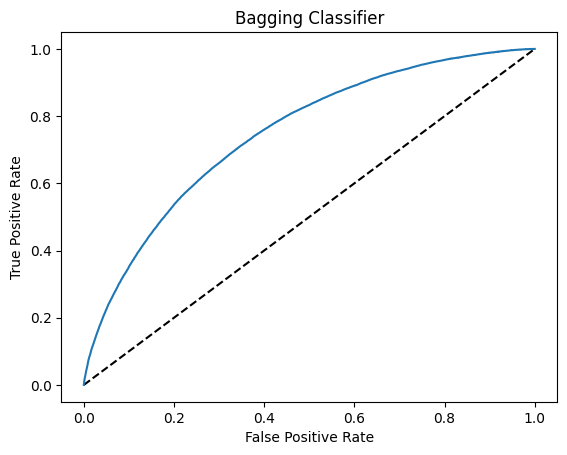

0.7477746591480965


In [113]:
y_pred_prob=model.predict_proba(train_df_onehot)[:,1]
fpr,tpr,thresholds=roc_curve(train_df[target],y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=model_name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(model_name)
plt.show()

print(roc_auc_score(train_df[target],y_pred_prob))